# Tutorial on MEEP simulation run with phcr-cavity.py
The tutorial is based on __[documentation example](https://meep.readthedocs.io/en/latest/Python_Tutorials/Resonant_Modes_and_Transmission_in_a_Waveguide_Cavity/)__. 

To run the simulation we have to address the python translator by running system command with <b>!</b> symbol. 

We run simulation code <b>phcr-cavity.py</b>

The console output is saved at <b>Output.txt</b>

In [64]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np
from scipy.special import j1
from subprocess import call
import matplotlib.pyplot as plt

resolution = 20  # pixels/a

wavelength = 1.550e-6   # resonant wavelength
a = 0.330e-6        # units of m
h = 0.220e-6         # units of m
w = 0.700e-6         # units of m

g = 2*np.pi/a       # reciprocal lattice vector

c = 3e8

nSi = 3.46
epsSi = nSi**2
nAir = 1
epsAir = nAir**2

N = 10
Nd = np.linspace(1, N, N) # number of tapering profile of PC nanobeam
ff = np.zeros(N)  # ff of PC nanobeam
ffstart = 0.1765 # at f_res
ffend = 0.1373 # at gamma_max

R = np.zeros(N, float)

for j in range(N):
    ff[j] = ffstart - (Nd[j] - 1)**2/(N - 1)**2*(ffstart - ffend) # perturbed lattice constants for a defect
    R[j] = np.sqrt(ff[j]*a*w/np.pi) # units of "a" 

# num_k = 7

# f = np.genfromtxt("modes_N_h_10_k_05.dat", delimiter=",")

# omega_air = f[:,2]*g*c
# omega_diel = f[:,1]*g*c
# k = f[:,0]    
# ###########################################################################

# fig, ax = plt.subplots()   

# ax.plot(k, omega_diel/(2*np.pi*1e12), color = 'red', label='omega_diel(k)')
# ax.plot(k, omega_air/(2*np.pi*1e12), color = 'blue', label='omega_air(k)')
# ax.set_ylabel("Frequency, v, THz", size=16)
# ax.set_xlabel("Wave number, k, a.u.", size=16)
# ax.grid()
# plt.legend()
# plt.show()

# v_THz = 0.323647*g*c/(2*np.pi*1e12)
# lambda_v = c/(v_THz*1e12)
# # print("v_THz = ", v_THz, "lambda = ", lambda_v)

# print("omega_diel (THz) =", omega_diel/(2*np.pi*1e12), '\n' 
#       "omega_air (THz) =", omega_air/(2*np.pi*1e12) )

print("ff = ", ff, '\n'
     "R = ", R)

ff =  [0.1765     0.17601605 0.1745642  0.17214444 0.16875679 0.16440123
 0.15907778 0.15278642 0.14552716 0.1373    ] 
R =  [2.78443422e-07 2.78061423e-07 2.76912267e-07 2.74986335e-07
 2.72267143e-07 2.68730614e-07 2.64343944e-07 2.59063951e-07
 2.52834675e-07 2.45583891e-07]


In [7]:
! grep zevenyoddfreqs: Output_disp_rel_N_h_10.txt |cut -d , -f3,7- |sed 1d > modes_N_h_10_k_05.dat

In [ ]:
! grep zevenyoddfreqs: Output_disp_rel_FF_30_2.txt |cut -d , -f3,7,8- |sed 1d > modes_FF_30_2_k_05.dat

In [138]:
! grep tmfreqs: Output_band_diagram_12.txt > tm_freqs_12.dat

In [139]:
! grep tefreqs: Output_band_diagram_12.txt > te_freqs_12.dat

In [139]:
! grep flux1: Output-PC-nanobeam-N-25-N_add-10-Flux-pixel-avg_4_v4.txt |cut -d , -f3,7- |sed 1d > .dat

In [ ]:
! mpirun -np 16 python PC-nanobeam-modes-FF.py > Output_disp_rel_FF_30_6_2.txt

In [ ]:
! mpirun -np 16 python v4_PC-nanobeam_meep-sim-Article.py -N 25 -N_add 10 -r true -pixavg true > Output-PC-nanobeam-defect-N-25-N_add-10-Q-factor-pixel-avg-Article.txt

In [ ]:
! mpirun -np 16 python v4_PC-nanobeam_meep-sim-Article.py -N 25 -N_add 10 -r false -pixavg true > Output-PC-nanobeam-defect-N-25-N_add-10-Flux-pixel-avg-Article.txt

In [ ]:
! mpirun -np 16 python v4_PC-nanobeam_meep-sim-without-defect-Article.py -N 25 -N_add 10 -r false -pixavg true > Output-PC-nanobeam-N-25-N_add-10-Flux-without-defect-pixel-avg-ffstart-Article.txt

For optional parallel run on several core we use mpi.

We may execute  <b>mpirun -np 6 </b>  routine for running the code with 6 cores:

In [58]:
! rm PC-nanobeam_mpb_meep-norm-sim-ey-*.h5

In [13]:
! rm v5_PC-nanobeam_meep*.png

In [44]:
! rm video-normal-ph-cav.mp4

In [12]:
! h5topng -S 6 -x 0:100 v5_PC-nanobeam_meep-sim-eps-000000.00.h5

In [76]:
! h5topng -S 6 -y 47:56 v5_PC-nanobeam_meep-sim-eps-000000.00.h5

In [46]:
! h5topng -S 6 -z 90 v5_PC-nanobeam_meep-sim-eps-000000.00.h5

In [39]:
! h5topng -t 1:200 -z 52 -S2 -Zc  dkbluered -a yarg -A v4_PC-nanobeam_meep-sim-without-defect-eps-000000.00.h5 v4_PC-nanobeam_meep-sim-without-defect-ey-slice.h5

h5topng error: invalid slice of HDF5 data


In [ ]:
from ipywidgets import Video, Image
video = Video.from_file("video-normal-ph-cav.mp4",play=True)
video

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

eps_h5file = h5py.File('v3_PC-nanobeam_meep-sim-eps-000000.00.h5','r')
eps_data = np.array(eps_h5file['eps'])
ey_h5file = h5py.File('v3_PC-nanobeam_meep-sim-ey-slice.h5','r')
ey_data = np.array(ey_h5file['ey'])
plt.figure(dpi=100)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ey_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

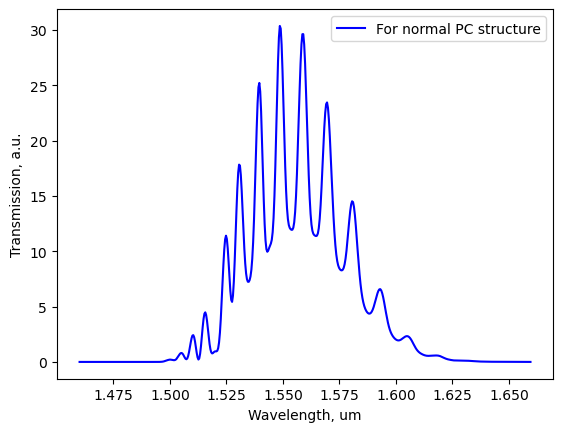

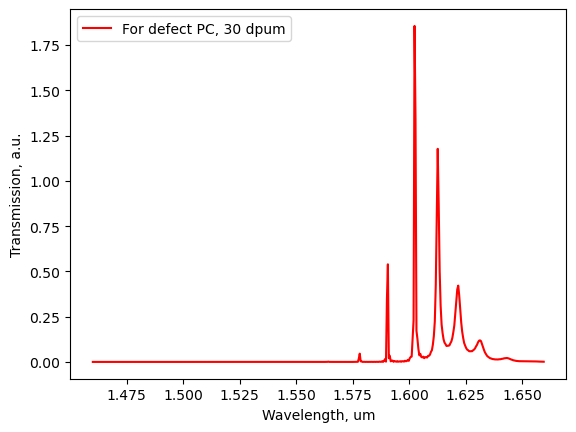

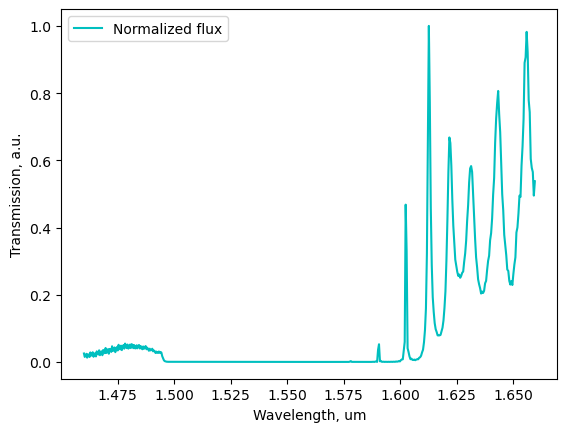

In [8]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

simfileName_n ='Output-PC-nanobeam-N-25-N_add-10-Flux-without-defect-pixel-avg-ffstart-Article.txt'
fileName_n = 'flux-norm-ph-nanobeam-N-25-ffstart-pixel-avg-Article.dat'

# simfileName_d ='Output-PC-nanobeam-defect-N-25-N_add-10-Flux-pixel-avg-Article.txt'
fileName_d_1 = 'flux-defect-ph-nanobeam-N-25-pixel-avg-Article.dat'
# fileName_d_2 = 'flux-defect-ph-nanobeam-N-25-pixel-avg_41_v4.dat'


ex_str_n =f'grep flux1: {simfileName_n}  | cut -d , -f2,3- | sed 1d > {fileName_n}'
# ex_str_d =f'grep flux1: {simfileName_d}  | cut -d , -f2,3- | sed 1d > {fileName_d_1}'

call(ex_str_n, shell="True")
# call(ex_str_d, shell="True")

f_n = np.genfromtxt(fileName_n, delimiter=",")
f_d_1 = np.genfromtxt(fileName_d_1, delimiter=",")
# f_d_2 = np.genfromtxt(fileName_d_2, delimiter=",")

nzd_f = f_d_1[:,1]/f_n[:,1] # Normalized flux


fig, ax = plt.subplots()
ax.plot(1/f_n[:,0],f_n[:,1], 'b-', label='For normal PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d_1[:,0],f_d_1[:,1], 'r-', label='For defect PC, 30 dpum')
# ax.plot(1/f_d_2[:,0],f_d_2[:,1], 'b-', label='For defect PC, 50 dpum')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

# fig, ax = plt.subplots()
# ax.plot(1/f_d_2[:,0],f_d_2[:,1], 'b-', label='For defect PC, 50 dpum')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# plt.legend()
# plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d_1[:,0],nzd_f/max(nzd_f), 'c-', label='Normalized flux')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
# plt.xlim(left=0.88, right=0.94)
plt.legend()
# plt.show()

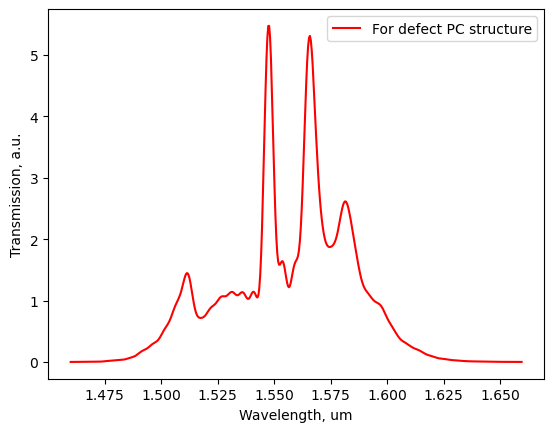

In [8]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

# simfileName_n ='Output-PC-nanobeam-N-25-N_add-10-Flux-without-defect-pixel-avg-ffend_3_v4.txt'
# fileName_n = 'flux-norm-ph-nanobeam-N-25-ffend-pixel-avg_3_v4.dat'

# simfileName_d ='Output-PC-nanobeam-N-25-N_add-10-Flux-pixel-avg_3_v5_2.txt'
# fileName_d = 'flux-defect-ph-nanobeam-N-25-pixel-avg_3_v5_2.dat'

simfileName_d ='Output-PC-nanobeam-defect-N-25-N_add-10-Flux-pixel-avg-Article.txt'
fileName_d = 'flux-defect-ph-nanobeam-N-25-pixel-avg-Article.dat'


# ex_str_n =f'grep flux1: {simfileName_n}  | cut -d , -f2,3- | sed 1d > {fileName_n}'
ex_str_d =f'grep flux1: {simfileName_d}  | cut -d , -f2,3- | sed 1d > {fileName_d}'

# call(ex_str_n, shell="True")
call(ex_str_d, shell="True")

# f_n = np.genfromtxt(fileName_n, delimiter=",")
f_d = np.genfromtxt(fileName_d, delimiter=",")

# nzd_f = f_d[:,1]/f_n[:,1] # Normalized flux


# fig, ax = plt.subplots()
# ax.plot(1/f_n[:,0],f_n[:,1], 'b-', label='For normal PC structure')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# plt.legend()
# plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],f_d[:,1], 'r-', label='For defect PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

# fig, ax = plt.subplots()
# ax.plot(1/f_d[:,0],nzd_f/max(nzd_f), 'c-', label='Normalized flux')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# # plt.xlim(left=0.88, right=0.94)
# plt.legend()
# plt.show()

In [1]:
q = 0.5*(1/1.65 + 1/1.45)
1/q


1.5435483870967743